In [77]:
root_path = '/Users/jack/Downloads/SysIdBench/'
dataset_names = ['F16', 'hyst', 'msd', 'ship']
model_names = ['lstm', 'rnn', 's4', 'relinet']
flexible_parameters = ['64','128']
results_folder_name = '2025_09_23-results'
seq_folder_name = 'seq'
seq_file_name = 'test_output'



In [78]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tikzplotlib
import os
import json
import pandas as pd

In [79]:
model_names

['lstm', 'rnn', 's4', 'relinet']

In [80]:

results = []
for data in dataset_names:

    for flex_param in flexible_parameters:
        for model in model_names:      
            print(f'Processing {data} with {model} and flex param {flex_param}')  
            local_result_dir = os.path.join(root_path, data, results_folder_name, f'{data}-{flex_param}-{model}')
            seq_mat_file = os.path.join(local_result_dir, seq_folder_name, f'{seq_file_name}-{data}.mat')
            if not os.path.exists(seq_mat_file):
                print(f'file {seq_mat_file} does not exist.')
                continue
            mat_data = loadmat(seq_mat_file)
            res = {
                'model_name': model,
                'data_name': data,
                'output': mat_data['e'][0],
                'predicted_output': mat_data['e_hat'][0]
            }
            results.append(res)

            

Processing F16 with lstm and flex param 64
file /Users/jack/Downloads/SysIdBench/F16/2025_09_23-results/F16-64-lstm/seq/test_output-F16.mat does not exist.
Processing F16 with rnn and flex param 64
file /Users/jack/Downloads/SysIdBench/F16/2025_09_23-results/F16-64-rnn/seq/test_output-F16.mat does not exist.
Processing F16 with s4 and flex param 64
file /Users/jack/Downloads/SysIdBench/F16/2025_09_23-results/F16-64-s4/seq/test_output-F16.mat does not exist.
Processing F16 with relinet and flex param 64
Processing F16 with lstm and flex param 128
Processing F16 with rnn and flex param 128
Processing F16 with s4 and flex param 128
Processing F16 with relinet and flex param 128
file /Users/jack/Downloads/SysIdBench/F16/2025_09_23-results/F16-128-relinet/seq/test_output-F16.mat does not exist.
Processing hyst with lstm and flex param 64
file /Users/jack/Downloads/SysIdBench/hyst/2025_09_23-results/hyst-64-lstm/seq/test_output-hyst.mat does not exist.
Processing hyst with rnn and flex param


Plotting results for F16:
True output shape: (100, 3)
Time steps: 100, Output channels: 3


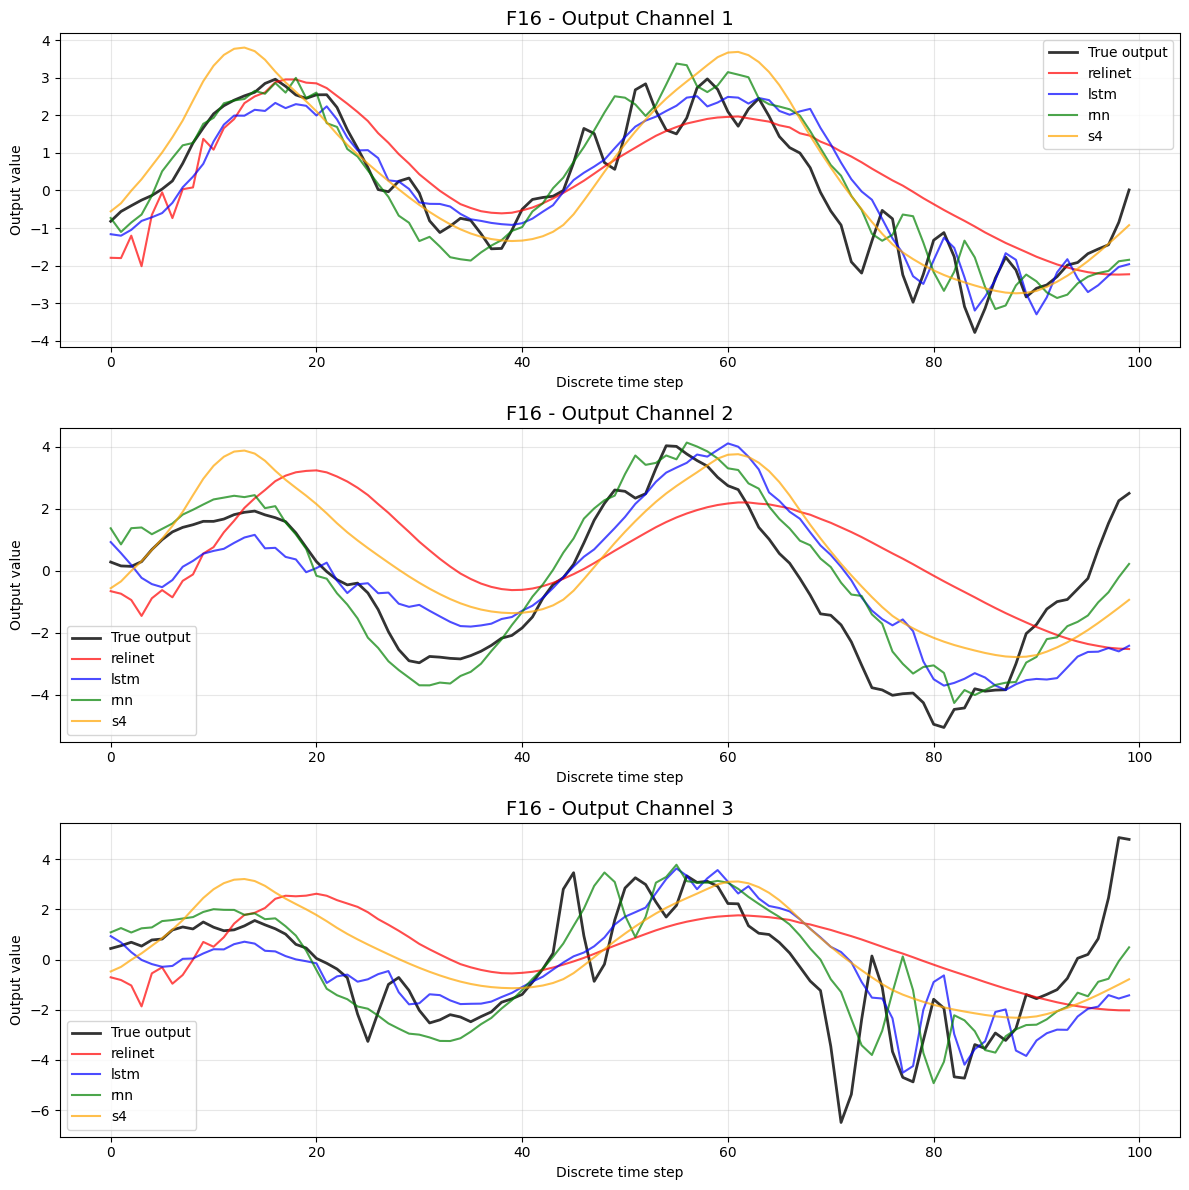


Plotting results for hyst:
True output shape: (100, 1)
Time steps: 100, Output channels: 1


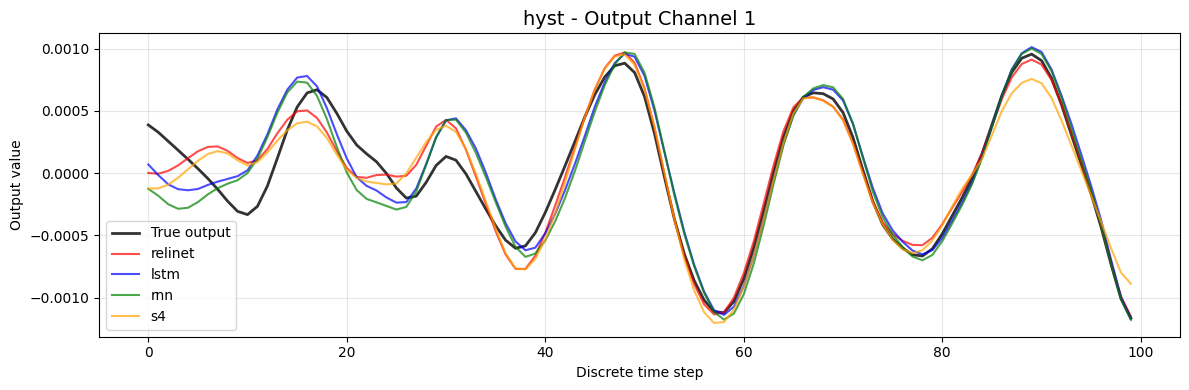


Plotting results for msd:
True output shape: (299, 1)
Time steps: 299, Output channels: 1


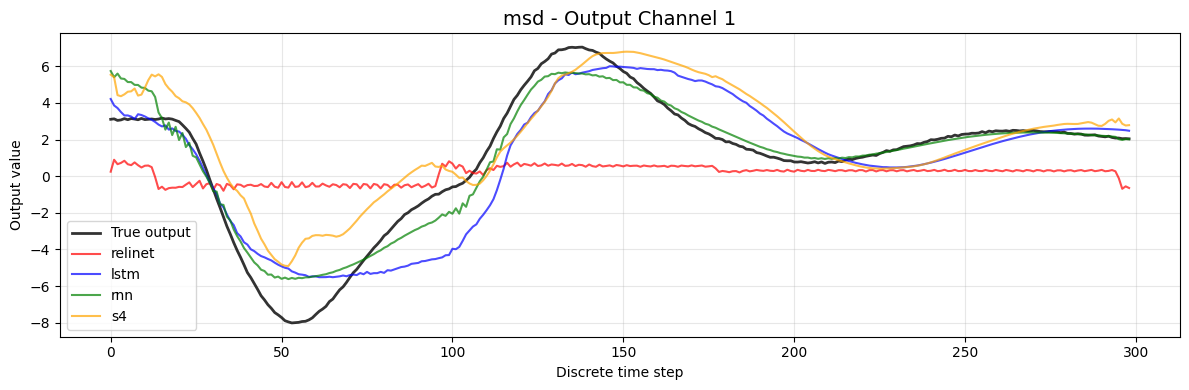


Plotting results for ship:
True output shape: (99, 4)
Time steps: 99, Output channels: 4


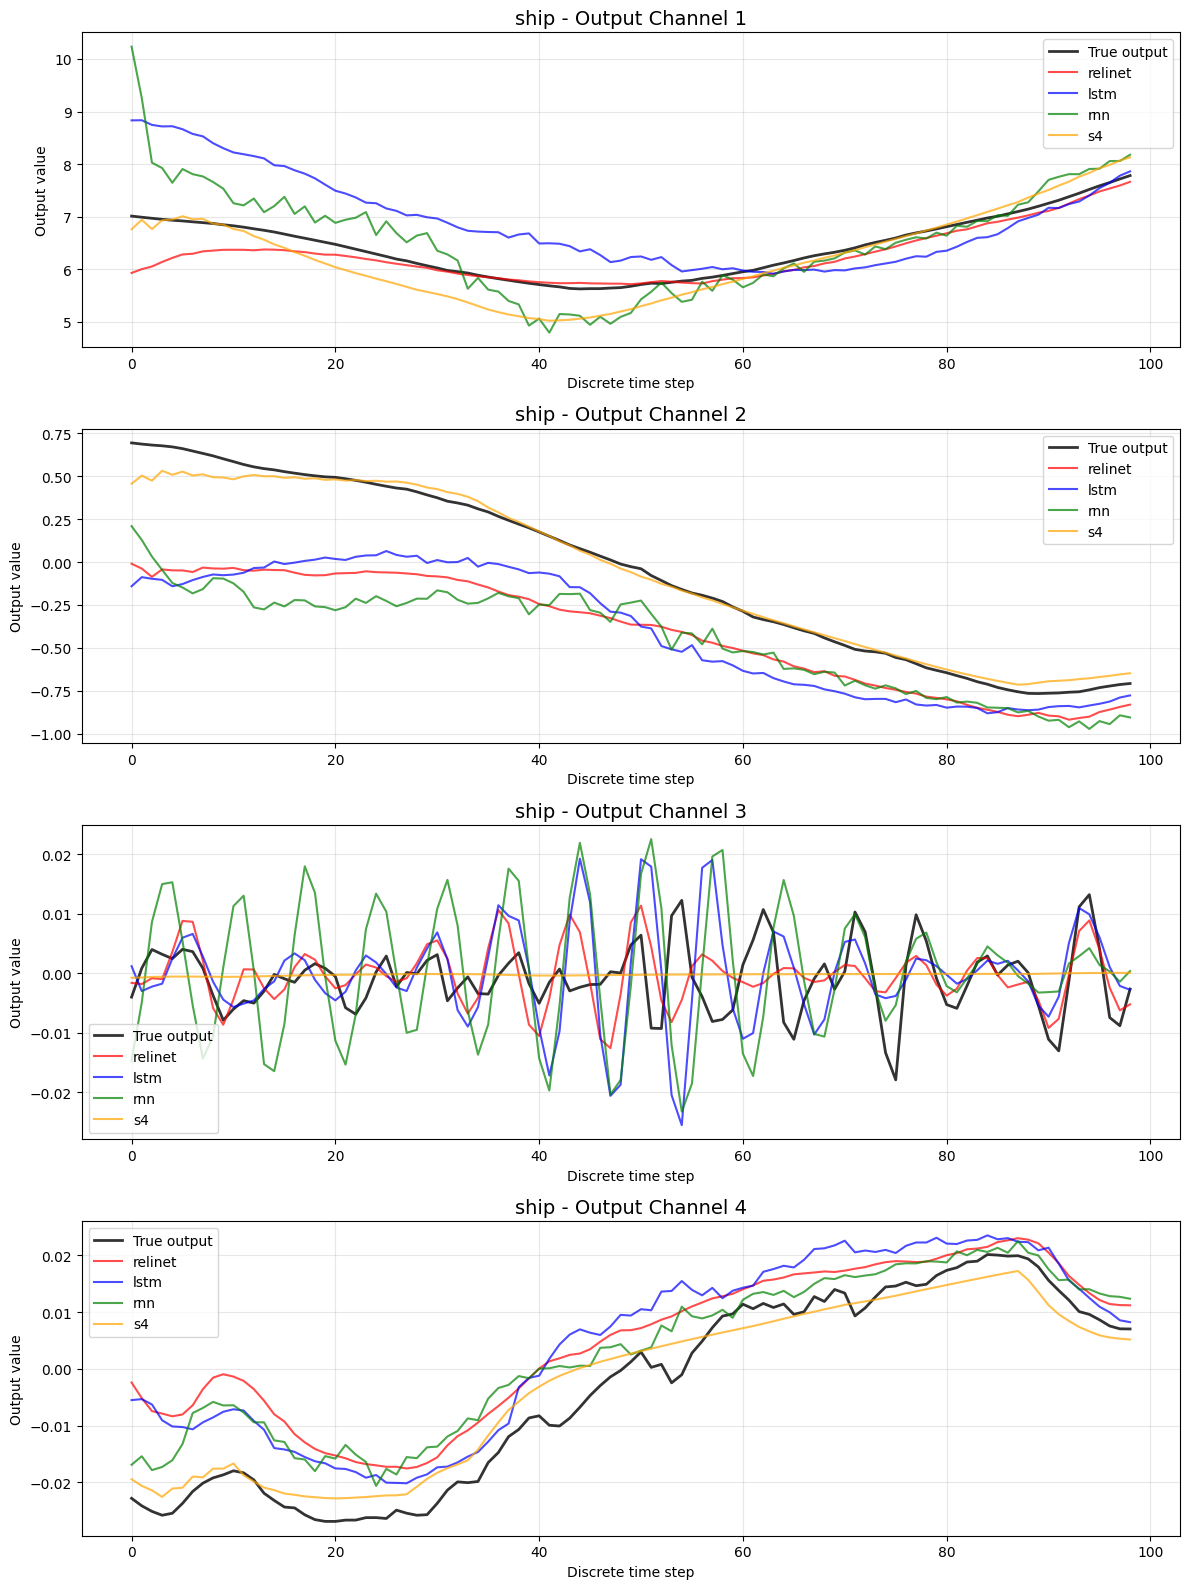

In [81]:
def plot_model_comparison(results, dataset_name):
    """
    Plot outputs of different models for one dataset.
    Each output dimension gets its own subplot.
    
    Args:
        results: List of dictionaries with keys 'data_name', 'model_name', 'output', 'predicted_output'
        dataset_name: Name of the dataset to plot
    """
    # Filter results for the specified dataset
    dataset_results = [res for res in results if res['data_name'] == dataset_name]
    
    if not dataset_results:
        print(f"No results found for dataset: {dataset_name}")
        return
    
    # Get the true output from the first result (should be same for all models)
    true_output = dataset_results[1]['output']  # Shape: (N, ne) where N=time_steps, ne=output_channels
    print(f"True output shape: {true_output.shape}")
    
    # Get number of time steps and output channels
    if len(true_output.shape) == 2:
        time_steps, ne = true_output.shape
    elif len(true_output.shape) == 1:
        time_steps = true_output.shape[0]
        ne = 1
        true_output = true_output.reshape(time_steps, 1)
    else:
        raise ValueError(f"Unexpected output shape: {true_output.shape}")
    
    print(f"Time steps: {time_steps}, Output channels: {ne}")
    
    # Create subplots - one for each output channel
    fig, axes = plt.subplots(ne, 1, figsize=(12, 4*ne))
    if ne == 1:
        axes = [axes]  # Make it a list for consistency
    
    # Plot each output channel
    for n_idx in range(ne):
        ax = axes[n_idx]
        
        # Plot true output
        true_y = true_output[:, n_idx]
        ax.plot(true_y, 'k-', linewidth=2, label='True output', alpha=0.8)
        
        # Plot predicted outputs for each model
        colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
        for i, res in enumerate(dataset_results):
            model_name = res['model_name']
            pred_output = res['predicted_output']
            
            # Handle shape consistency
            if len(pred_output.shape) == 1:
                pred_output = pred_output.reshape(-1, 1)
            
            pred_y = pred_output[:, n_idx]
            color = colors[i % len(colors)]
            ax.plot(pred_y, color=color, linewidth=1.5, label=f'{model_name}', alpha=0.7)
        
        # Formatting
        ax.set_title(f'{dataset_name} - Output Channel {n_idx+1}', fontsize=14)
        ax.set_xlabel('Discrete time step')
        ax.set_ylabel('Output value')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
        tikzplotlib.save(f'comparison_{dataset_name}-{n_idx+1}.tex')
    plt.tight_layout()
    plt.show()
    

# Example usage: Plot results for each dataset
for dataset in dataset_names:
    print(f"\nPlotting results for {dataset}:")
    plot_model_comparison(results, dataset)

In [60]:
config_files = []
for dataset in dataset_names:
    for flex_param in flexible_parameters:
        for model in model_names:      
            print(f'Processing {dataset} with {model} and flex param {flex_param}')  
            local_result_dir = os.path.join(root_path, dataset, results_folder_name, f'{dataset}-{flex_param}-{model}')
            if not os.path.exists(local_result_dir):
                print(f"Directory does not exist: {local_result_dir}")
                continue

            
            exp_config_filename = os.path.join(local_result_dir, f'config-experiment-{dataset}-{flex_param}-{model}.json')
            model_config_filename = os.path.join(local_result_dir, f'config-model-{dataset}-{flex_param}-{model}.json')

            print(os.path.exists(model_config_filename))

            config_files.append({
                'data_name': dataset,
                'model_name': model,
                'model_config_file': model_config_filename,
                'exp_config_file': exp_config_filename
            })

Processing F16 with lstm and flex param 128
True
Processing F16 with rnn and flex param 128
True
Processing F16 with s4 and flex param 128
True
Processing hyst with lstm and flex param 128
True
Processing hyst with rnn and flex param 128
True
Processing hyst with s4 and flex param 128
True
Processing msd with lstm and flex param 128
True
Processing msd with rnn and flex param 128
True
Processing msd with s4 and flex param 128
True
Processing ship with lstm and flex param 128
True
Processing ship with rnn and flex param 128
True
Processing ship with s4 and flex param 128
True


In [58]:
config_files

[{'data_name': 'F16',
  'model_name': 'lstm',
  'model_config_file': '/Users/jack/Downloads/SysIdBench/F16/2025_09_23-results/F16-128-lstm/config-model-F16-128-lstm.json',
  'exp_config_file': '/Users/jack/Downloads/SysIdBench/F16/2025_09_23-results/F16-128-lstm/config-experiment-F16-128-lstm.json'},
 {'data_name': 'F16',
  'model_name': 'rnn',
  'model_config_file': '/Users/jack/Downloads/SysIdBench/F16/2025_09_23-results/F16-128-rnn/config-model-F16-128-rnn.json',
  'exp_config_file': '/Users/jack/Downloads/SysIdBench/F16/2025_09_23-results/F16-128-rnn/config-experiment-F16-128-rnn.json'},
 {'data_name': 'F16',
  'model_name': 's4',
  'model_config_file': '/Users/jack/Downloads/SysIdBench/F16/2025_09_23-results/F16-128-s4/config-model-F16-128-s4.json',
  'exp_config_file': '/Users/jack/Downloads/SysIdBench/F16/2025_09_23-results/F16-128-s4/config-experiment-F16-128-s4.json'},
 {'data_name': 'hyst',
  'model_name': 'lstm',
  'model_config_file': '/Users/jack/Downloads/SysIdBench/hyst/

In [63]:
def load_configuration_data(config_files):
    """
    Load model and experiment configuration files and create a comprehensive table
    using the provided config_files list
    
    Args:
        config_files: List of dictionaries with keys 'data_name', 'model_name', 'model_config_file', 'exp_config_file'
    """
    config_data = []
    
    for config_entry in config_files:
        dataset = config_entry['data_name']
        model = config_entry['model_name']
        exp_config_filename = config_entry['exp_config_file']
        model_config_filename = config_entry['model_config_file']
        print(exp_config_filename)
        
        print(f'Loading configs for {dataset} with {model}')
        
        # Initialize row data
        row_data = {
            'Dataset': dataset,
            'Model': model,
            'Flex Param': flexible_parameters[0]  # Using the first (and likely only) flex param
        }
        
        # Load experiment config
        if os.path.exists(exp_config_filename):
            try:
                with open(exp_config_filename, 'r') as f:
                    exp_config = json.load(f)
                
                # Extract important experiment fields
                exp_fields = {
                    'Epochs': exp_config.get('epochs', 'N/A'),
                    'Batch Size': exp_config.get('batch_size', 'N/A'),
                    'Learning Rate': exp_config.get('learning_rate', 'N/A'),
                    'Optimizer': exp_config.get('optimizer', 'N/A'),
                    'Loss Function': exp_config.get('loss_function', 'N/A'),
                    'Early Stopping': exp_config.get('early_stopping', 'N/A'),
                    'Validation Split': exp_config.get('validation_split', 'N/A')
                }
                row_data.update(exp_fields)
            except Exception as e:
                print(f"Error loading experiment config for {dataset}-{model}: {e}")
        else:
            print(f"Experiment config file not found: {exp_config_filename}")
                
        # Load model config
        if os.path.exists(model_config_filename):
            try:
                with open(model_config_filename, 'r') as f:
                    model_config = json.load(f)
                
                # Extract all model configuration fields
                # Flatten nested dictionaries if any
                def flatten_dict(d, parent_key='', sep='_'):
                    items = []
                    for k, v in d.items():
                        new_key = f"{parent_key}{sep}{k}" if parent_key else k
                        if isinstance(v, dict):
                            items.extend(flatten_dict(v, new_key, sep=sep).items())
                        else:
                            items.append((new_key, v))
                    return dict(items)
                
                flattened_model_config = flatten_dict(model_config)
                
                # Add model config fields with 'Model_' prefix to distinguish from experiment fields
                for key, value in flattened_model_config.items():
                    row_data[f'Model_{key}'] = value
                    
            except Exception as e:
                print(f"Error loading model config for {dataset}-{model}: {e}")
        else:
            print(f"Model config file not found: {model_config_filename}")
        
        config_data.append(row_data)
    
    return config_data

# Load all configuration data using the prepared config_files list
config_data = load_configuration_data(config_files)

/Users/jack/Downloads/SysIdBench/F16/2025_09_23-results/F16-128-lstm/config-experiment-F16-128-lstm.json
Loading configs for F16 with lstm
/Users/jack/Downloads/SysIdBench/F16/2025_09_23-results/F16-128-rnn/config-experiment-F16-128-rnn.json
Loading configs for F16 with rnn
/Users/jack/Downloads/SysIdBench/F16/2025_09_23-results/F16-128-s4/config-experiment-F16-128-s4.json
Loading configs for F16 with s4
/Users/jack/Downloads/SysIdBench/hyst/2025_09_23-results/hyst-128-lstm/config-experiment-hyst-128-lstm.json
Loading configs for hyst with lstm
/Users/jack/Downloads/SysIdBench/hyst/2025_09_23-results/hyst-128-rnn/config-experiment-hyst-128-rnn.json
Loading configs for hyst with rnn
/Users/jack/Downloads/SysIdBench/hyst/2025_09_23-results/hyst-128-s4/config-experiment-hyst-128-s4.json
Loading configs for hyst with s4
/Users/jack/Downloads/SysIdBench/msd/2025_09_23-results/msd-128-lstm/config-experiment-msd-128-lstm.json
Loading configs for msd with lstm
/Users/jack/Downloads/SysIdBench/

In [64]:
def create_latex_table(config_data):
    """
    Create a LaTeX table from configuration data
    """
    if not config_data:
        print("No configuration data available")
        return
    
    # Convert to DataFrame for easier manipulation
    df = pd.DataFrame(config_data)
    
    # Display the DataFrame first
    print("Configuration Data Preview:")
    print(df.head())
    print(f"\nTotal rows: {len(df)}")
    print(f"Columns: {list(df.columns)}")
    
    # Create a more focused table with key information
    # Select the most important columns
    key_columns = ['Dataset', 'Model', 'Flex Param']
    
    # Add experiment columns if they exist
    exp_columns = [col for col in df.columns if col in ['Epochs', 'Batch Size', 'Learning Rate', 'Optimizer', 'Loss Function']]
    key_columns.extend(exp_columns)
    
    # Add key model columns (filter for most important ones)
    model_columns = [col for col in df.columns if col.startswith('Model_')]
    # Prioritize certain model parameters
    priority_model_cols = []
    for col in model_columns:
        if any(keyword in col.lower() for keyword in ['hidden', 'layer', 'dim', 'size', 'activation', 'dropout']):
            priority_model_cols.append(col)
    
    # Take first few model columns if we have many
    if len(priority_model_cols) > 6:
        priority_model_cols = priority_model_cols[:6]
    elif len(model_columns) > 6:
        priority_model_cols = model_columns[:6]
    else:
        priority_model_cols = model_columns
    
    key_columns.extend(priority_model_cols)
    
    # Filter DataFrame to key columns that exist
    available_columns = [col for col in key_columns if col in df.columns]
    df_filtered = df[available_columns]
    
    # Generate LaTeX table
    latex_table = df_filtered.to_latex(
        index=False,
        escape=False,
        column_format='|' + 'c|' * len(df_filtered.columns),
        caption="Model and Experiment Configuration Summary",
        label="tab:config_summary"
    )
    
    print("\n" + "="*80)
    print("LATEX TABLE:")
    print("="*80)
    print(latex_table)
    
    # Also create a comprehensive table with all columns
    print("\n" + "="*80)
    print("ALL COLUMNS LATEX TABLE:")
    print("="*80)
    
    # For very wide tables, we might want to rotate or split
    if len(df.columns) > 10:
        # Create a rotated table
        latex_table_full = df.to_latex(
            index=False,
            escape=False,
            longtable=True,
            caption="Complete Model and Experiment Configuration",
            label="tab:config_complete"
        )
        print("% Use \\usepackage{longtable} in your LaTeX preamble")
        print("% Use \\usepackage{rotating} for landscape orientation if needed")
    else:
        latex_table_full = df.to_latex(
            index=False,
            escape=False,
            column_format='|' + 'c|' * len(df.columns),
            caption="Complete Model and Experiment Configuration",
            label="tab:config_complete"
        )
    
    print(latex_table_full)
    
    # Save to file
    with open('config_table.tex', 'w') as f:
        f.write(latex_table)
    
    with open('config_table_complete.tex', 'w') as f:
        f.write(latex_table_full)
    
    print(f"\nTables saved to 'config_table.tex' and 'config_table_complete.tex'")
    
    return df_filtered, df

# Create and display the LaTeX table
df_key, df_full = create_latex_table(config_data)

Configuration Data Preview:
  Dataset Model Flex Param  Epochs  Batch Size Learning Rate  \
0     F16  lstm        128    1000          16           N/A   
1     F16   rnn        128    1000          16           N/A   
2     F16    s4        128    1000          16           N/A   
3    hyst  lstm        128    1000          16           N/A   
4    hyst   rnn        128    1000          16           N/A   

                                  Optimizer Loss Function Early Stopping  \
0  {'name': 'adam', 'learning_rate': 0.001}           mse            N/A   
1  {'name': 'adam', 'learning_rate': 0.001}           mse            N/A   
2  {'name': 'adam', 'learning_rate': 0.001}           mse            N/A   
3  {'name': 'adam', 'learning_rate': 0.001}           mse            N/A   
4  {'name': 'adam', 'learning_rate': 0.001}           mse            N/A   

  Validation Split  Model_nd  Model_ne  Model_nz  Model_dropout  \
0              N/A         1         3       128           0.25

/var/folders/20/k44l3vsj03x1v_37v25mlp4w0000gn/T/ipykernel_1751/169639782.py:49: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_filtered.to_latex(
/var/folders/20/k44l3vsj03x1v_37v25mlp4w0000gn/T/ipykernel_1751/169639782.py:70: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table_full = df.to_latex(


In [65]:
def inspect_config_fields(config_data):
    """
    Inspect what fields are available in the configuration data
    """
    if not config_data:
        print("No configuration data available")
        return
    
    df = pd.DataFrame(config_data)
    
    print("Available fields in configuration data:")
    print("-" * 50)
    
    exp_fields = [col for col in df.columns if not col.startswith('Model_') and col not in ['Dataset', 'Model', 'Flex Param']]
    model_fields = [col for col in df.columns if col.startswith('Model_')]
    
    print(f"Basic Info: Dataset, Model, Flex Param")
    print(f"\nExperiment fields ({len(exp_fields)}):")
    for field in exp_fields:
        print(f"  - {field}")
    
    print(f"\nModel fields ({len(model_fields)}):")
    for field in model_fields:
        print(f"  - {field}")
    
    print(f"\nTotal fields: {len(df.columns)}")
    
    # Show sample values for each field
    print("\nSample values:")
    print("-" * 50)
    for col in df.columns[:10]:  # Show first 10 columns
        unique_vals = df[col].unique()
        if len(unique_vals) <= 5:
            print(f"{col}: {list(unique_vals)}")
        else:
            print(f"{col}: {list(unique_vals[:3])} ... ({len(unique_vals)} unique values)")

# Inspect the configuration fields
inspect_config_fields(config_data)

Available fields in configuration data:
--------------------------------------------------
Basic Info: Dataset, Model, Flex Param

Experiment fields (7):
  - Epochs
  - Batch Size
  - Learning Rate
  - Optimizer
  - Loss Function
  - Early Stopping
  - Validation Split

Model fields (6):
  - Model_nd
  - Model_ne
  - Model_nz
  - Model_dropout
  - Model_num_layers
  - Model_nonlinearity

Total fields: 16

Sample values:
--------------------------------------------------
Dataset: ['F16', 'hyst', 'msd', 'ship']
Model: ['lstm', 'rnn', 's4']
Flex Param: ['128']
Epochs: [1000]
Batch Size: [16]
Learning Rate: ['N/A']


TypeError: unhashable type: 'dict'

In [66]:
def create_custom_latex_table(config_data, selected_columns=None, table_title="Configuration Summary"):
    """
    Create a customized LaTeX table with specified columns
    
    Args:
        config_data: List of configuration dictionaries
        selected_columns: List of column names to include. If None, uses a default selection
        table_title: Title for the LaTeX table
    """
    if not config_data:
        print("No configuration data available")
        return
    
    df = pd.DataFrame(config_data)
    
    # Default column selection if none provided
    if selected_columns is None:
        selected_columns = [
            'Dataset', 'Model', 'Flex Param',
            'Epochs', 'Batch Size', 'Learning Rate',
            'Model_hidden_size', 'Model_num_layers', 'Model_dropout'
        ]
    
    # Filter to only include columns that exist
    available_columns = [col for col in selected_columns if col in df.columns]
    missing_columns = [col for col in selected_columns if col not in df.columns]
    
    if missing_columns:
        print(f"Warning: The following columns were not found: {missing_columns}")
    
    if not available_columns:
        print("No valid columns found!")
        return
    
    df_selected = df[available_columns]
    
    # Clean up column names for LaTeX (remove Model_ prefix and make readable)
    clean_columns = []
    for col in df_selected.columns:
        if col.startswith('Model_'):
            clean_col = col.replace('Model_', '').replace('_', ' ').title()
        else:
            clean_col = col.replace('_', ' ').title()
        clean_columns.append(clean_col)
    
    df_selected.columns = clean_columns
    
    # Generate LaTeX table
    latex_table = df_selected.to_latex(
        index=False,
        escape=False,
        column_format='|' + 'c|' * len(df_selected.columns),
        caption=table_title,
        label=f"tab:{table_title.lower().replace(' ', '_')}"
    )
    
    print("CUSTOMIZED LATEX TABLE:")
    print("-" * 80)
    print(latex_table)
    
    # Save to file
    filename = f"custom_config_table.tex"
    with open(filename, 'w') as f:
        f.write(latex_table)
    
    print(f"\nTable saved to '{filename}'")
    
    return df_selected

# Example: Create a custom table with specific columns
# You can modify this list to include the columns you want
custom_columns = [
    'Dataset', 'Model', 'Flex Param',
    'Epochs', 'Batch Size', 'Learning Rate', 'Optimizer',
    # Add model-specific columns as needed
    # 'Model_hidden_size', 'Model_num_layers', 'Model_dropout', etc.
]

print("Creating custom table...")
custom_df = create_custom_latex_table(config_data, custom_columns, "Model Configuration Summary")

Creating custom table...
CUSTOMIZED LATEX TABLE:
--------------------------------------------------------------------------------
\begin{table}
\centering
\caption{Model Configuration Summary}
\label{tab:model_configuration_summary}
\begin{tabular}{|c|c|c|c|c|c|c|}
\toprule
Dataset & Model & Flex Param &  Epochs &  Batch Size & Learning Rate &                                Optimizer \\
\midrule
    F16 &  lstm &        128 &    1000 &          16 &           N/A & {'name': 'adam', 'learning_rate': 0.001} \\
    F16 &   rnn &        128 &    1000 &          16 &           N/A & {'name': 'adam', 'learning_rate': 0.001} \\
    F16 &    s4 &        128 &    1000 &          16 &           N/A & {'name': 'adam', 'learning_rate': 0.001} \\
   hyst &  lstm &        128 &    1000 &          16 &           N/A & {'name': 'adam', 'learning_rate': 0.001} \\
   hyst &   rnn &        128 &    1000 &          16 &           N/A & {'name': 'adam', 'learning_rate': 0.001} \\
   hyst &    s4 &        1

/var/folders/20/k44l3vsj03x1v_37v25mlp4w0000gn/T/ipykernel_1751/908401650.py:49: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_selected.to_latex(
